In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**citation**

@misc{misc_magic_gamma_telescope_159,
  author       = {Bock,R.},
  title        = {{MAGIC Gamma Telescope}},
  year         = {2007},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C52C8B}
}

In [ ]:
df = pd.read_csv("magic04.data")

In [ ]:
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [2]:
#datafram don't have the sample names
col = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]


In [3]:
df = pd.read_csv("magic04.data", names = col)

In [4]:
#Target class not in the form of intergers
df["class"] = (df["class"] == "g").astype(int)

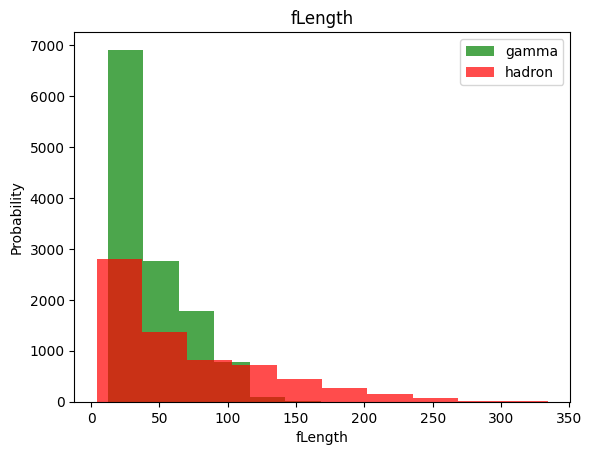

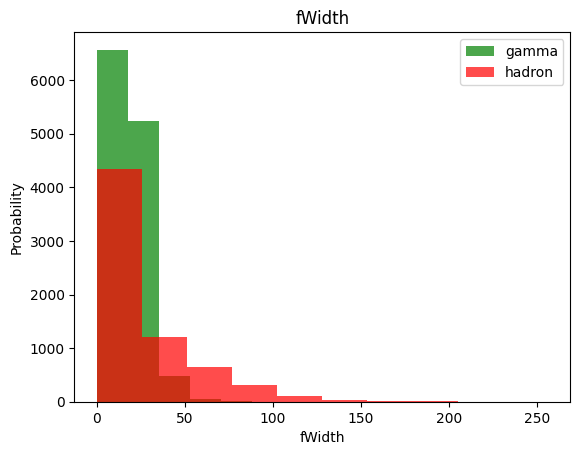

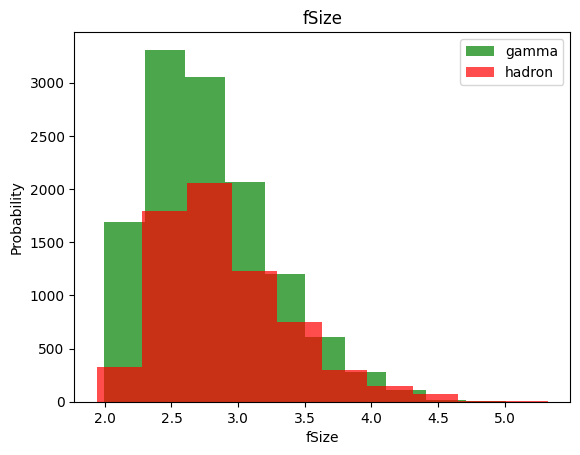

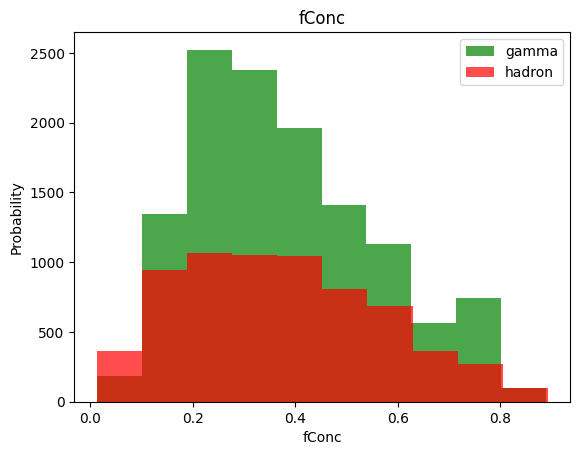

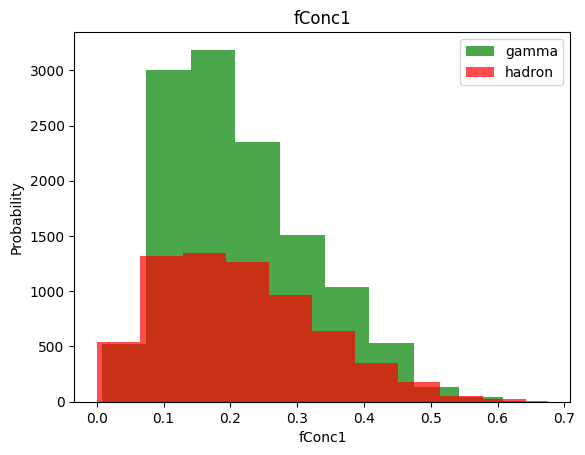

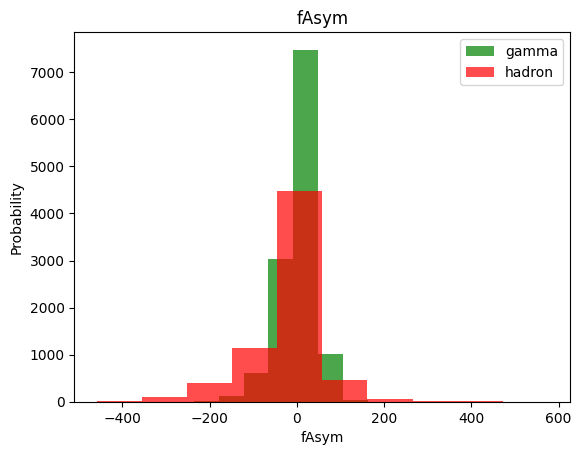

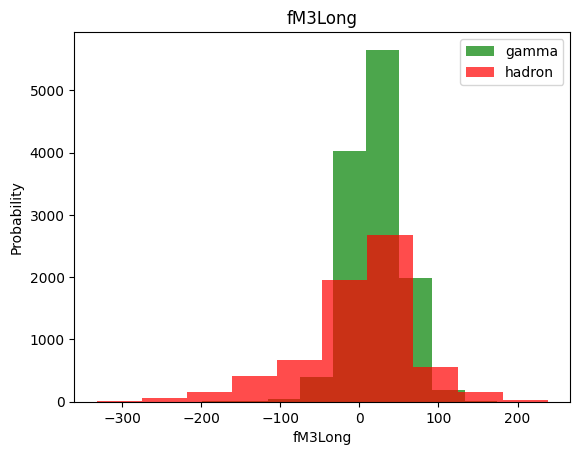

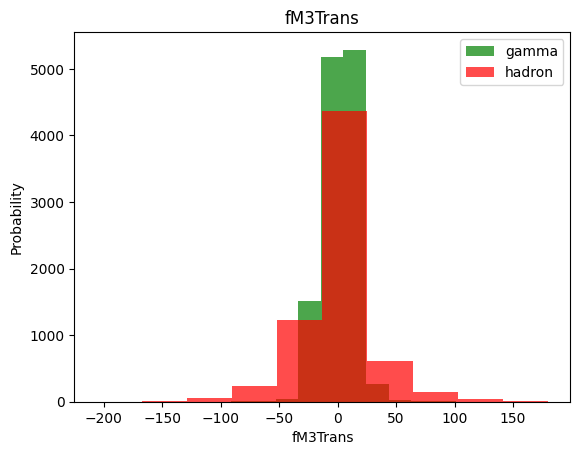

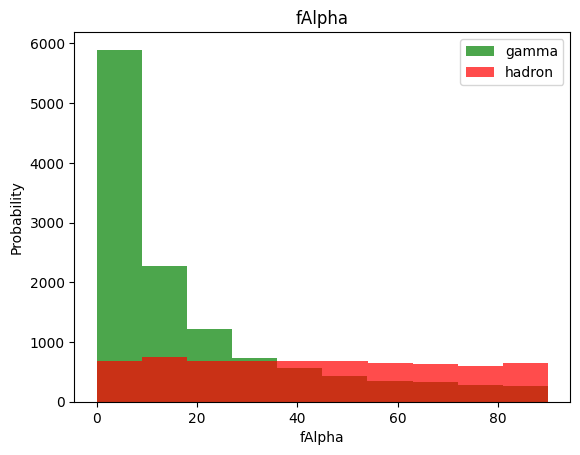

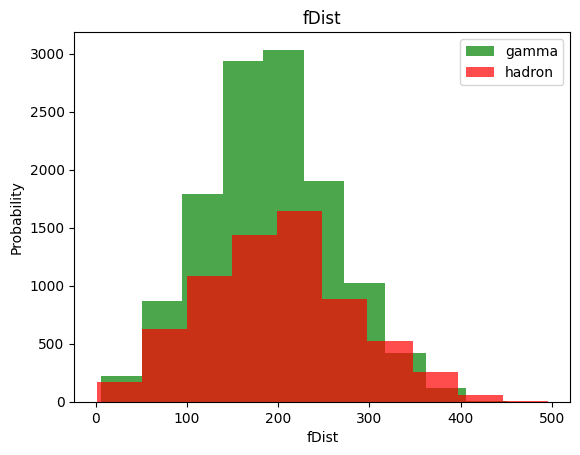

In [5]:
#checking any feacture can be voided

for label in col[:-1]:
  plt.hist(df[df["class"] == 1][label], label = "gamma", color = "green", alpha = 0.7, density = False)
  plt.hist(df[df["class"] == 0][label], label = "hadron", color = "red", alpha = 0.7, density = False)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

In [5]:
#spliting the data into parts into 60, 20, 20

tain, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
print(sum(df["class"] == 1))
print(sum(df["class"] == 0))


12332
6688


In [6]:
#gamma have more so making same no. of samples, while training dataset making both gamma & hadron have same samples
#Scaling feature vector

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

def preprocessing(df, over_sample = False):
  x = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  sclar = StandardScaler()
  x = sclar.fit_transform(x)
  if over_sample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [7]:
train_data, x_train, y_train = preprocessing(tain, over_sample= True)
valid_data, x_valid, y_valid = preprocessing(valid)
test_data, x_test, y_test = preprocessing(test)

In [26]:
#traing the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [ ]:
for n in range(2,6):
  knn_model = KNeighborsClassifier(n_neighbors=5)
  knn_model.fit(x_train, y_train)
  pred = knn_model.predict(x_test)
  print(f"neigbhors = {n}\n")
  print(classification_report(pred, y_test))

neigbhors = 2

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1333
           1       0.86      0.86      0.86      2471

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

neigbhors = 3

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1333
           1       0.86      0.86      0.86      2471

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

neigbhors = 4

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1333
           1       0.86      0.86      0.86      2471

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      

In [ ]:
gussian_model = GaussianNB()
gussian_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
pred = gussian_model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.41      0.69      0.52       802
           1       0.90      0.74      0.81      3002

    accuracy                           0.73      3804
   macro avg       0.66      0.71      0.66      3804
weighted avg       0.80      0.73      0.75      3804



In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)


SVC()

In [ ]:
pred = svc_model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1350
           1       0.90      0.90      0.90      2454

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



In [11]:
import tensorflow as tf

In [ ]:
nn_model = tf.keras.Sequential([
           tf.keras.layers.Dense(32, activation="relu", batch_size=(10)),
           tf.keras.layers.Dense(32, activation="relu"),
           tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
nn_model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=None)

In [ ]:
pred = nn_model.predict(x_test)

119/119 [==============================] - 0s 2ms/step


In [ ]:
pred = np.reshape((pred>0.5).astype(int),-1)

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1251
           1       0.92      0.89      0.91      2553

    accuracy                           0.88      3804
   macro avg       0.86      0.87      0.86      3804
weighted avg       0.88      0.88      0.88      3804



In [12]:
def tain_model(x_train, y_train, num_nodes, droupouts_prob, lr, batch_size, epochs):

  nn_model = tf.keras.Sequential([
           tf.keras.layers.Dense(num_nodes, activation="relu", batch_size=(10)),
           tf.keras.layers.Dropout(droupouts_prob),
           tf.keras.layers.Dense(num_nodes, activation="relu"),
           tf.keras.layers.Dropout(droupouts_prob),
           tf.keras.layers.Dense(1, activation="sigmoid")
            ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
  histroy = nn_model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size, verbose=None)

  return nn_model, histroy

In [14]:
least_loss_val = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for droupouts_prob in [0, 0.2]:
    for lr in [0.001, 0.01, 0.005]:
      for batch_size in [32,64,128]:
        model, history = tain_model(x_train, y_train, num_nodes, droupouts_prob, lr, batch_size, epochs)
        current_model = model.evaluate(x_valid, y_valid)[0]
        if current_model < least_loss_val:
          least_loss_val = current_model
          least_loss_model = model

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8759


In [15]:
least_loss_val


0.29821398854255676

In [18]:
pred = least_loss_model.predict(x_test)

119/119 [==============================] - 1s 6ms/step


In [19]:
pred

array([[0.7340595 ],
       [0.9560055 ],
       [0.99473643],
       ...,
       [0.9329563 ],
       [0.74632967],
       [0.03687485]], dtype=float32)

In [22]:
pred = np.reshape((pred>0.5).astype(int), -1)

In [23]:
pred

array([1, 1, 1, ..., 1, 1, 0])

In [27]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1144
           1       0.94      0.88      0.91      2660

    accuracy                           0.88      3804
   macro avg       0.85      0.88      0.86      3804
weighted avg       0.89      0.88      0.88      3804

